# COMP377: AI for Software Developers
## Assignment 2: Logestic Regression
### Exercise 2

Name: ---------------------Mahsa Dorri---------------------------------

Student ID: --------------301257460-------------------

Date: ---------------------Feb 24 2024-------------------------------------

File Name: MahsaDorri_Lab2_Ex2

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import requests
import gzip
import io

### Part 1: Data Loading

In [18]:
# Part 1: Data Loading
base_url = "http://yann.lecun.com/exdb/mnist/"
train_images_url = base_url + "train-images-idx3-ubyte.gz"
train_labels_url = base_url + "train-labels-idx1-ubyte.gz"
test_images_url = base_url + "t10k-images-idx3-ubyte.gz"
test_labels_url = base_url + "t10k-labels-idx1-ubyte.gz"

# Functions to read MNIST images and labels
def read_mnist_images(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with gzip.GzipFile(fileobj=io.BytesIO(response.content)) as gzip_file:
            gzip_file.read(16)
            buffer = gzip_file.read()
            data = np.frombuffer(buffer, dtype=np.uint8)
            return data.reshape(-1, 784) / 255.0
    else:
        raise ValueError("Failed to download data from:", url)

def read_mnist_labels(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with gzip.GzipFile(fileobj=io.BytesIO(response.content)) as gzip_file:
            gzip_file.read(8)
            buffer = gzip_file.read()
            data = np.frombuffer(buffer, dtype=np.uint8)
            return data
    else:
        raise ValueError("Failed to download data from:", url)

# Load MNIST data
train_images = read_mnist_images(train_images_url)
train_labels = read_mnist_labels(train_labels_url)
test_images = read_mnist_images(test_images_url)
test_labels = read_mnist_labels(test_labels_url)

# Verify shapes
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

X_train_flat, y_train = train_images, train_labels
X_test_flat, y_test = test_images, test_labels


Train Images Shape: (60000, 784)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 784)
Test Labels Shape: (10000,)


#!!!!!!!!!!!!!!!!!!at step on i tried to load data with high API.These shapes allow for a comprehensive training and testing of models on the MNIST dataset!!!!!!!!!!!!!!!!!!!!!!!!!!

### Part 2: Data Preprocessing

#!!!!!!!!!!!!!!!!!!!!!!!!!Flattening the images!!!!!!!!!!!!!!!!!!!!

In [19]:
X_train_flat = train_images.reshape(-1, 28*28).astype('float32') / 255.0
X_test_flat = test_images.reshape(-1, 28*28).astype('float32') / 255.0

X_train_flat, X_val_flat, y_train, y_val = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=42
)


### Part 3: Create and Train Model

In [10]:
#svm 
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train_flat, y_train)





SVC()

In [11]:
#logestic
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(X_train_flat, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

### Part 4: Test Model

In [12]:
# SVM Predictions and Accuracy
y_pred_svm = svm_clf.predict(X_test_flat)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")

# Logistic Regression Predictions and Accuracy
y_pred_log_reg = log_reg.predict(X_test_flat)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Model Accuracy: {accuracy_log_reg}")


SVM Model Accuracy: 0.9777
Logistic Regression Model Accuracy: 0.764


#On the MNIST dataset, the SVM model performed better than the Logistic Regression model (92.48%), with an accuracy of 97.77%, suggesting that the SVM model was more appropriate for this image classification task.

### Part 5: Calculate Accuracy & Accuracy

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# SVM Model Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("SVM Model Performance:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")
print("\nClassification Report for SVM Model:")
print(classification_report(y_test, y_pred_svm))

# Logistic Regression Model Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1-Score: {f1_log_reg}")
print("\nClassification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_log_reg))



SVM Model Performance:
Accuracy: 0.9777
Precision: 0.9777048063611914
Recall: 0.9777
F1-Score: 0.9776832358687559

Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Logistic Regression Model Performance:
Accuracy: 0.764
Precision: 0.8056620452580698
Reca

#On the MNIST dataset, the SVM model performs better than Logistic Regression, obtaining higher accuracy, precision, recall, and F1-scores,

### Visualization and Display (Optional)

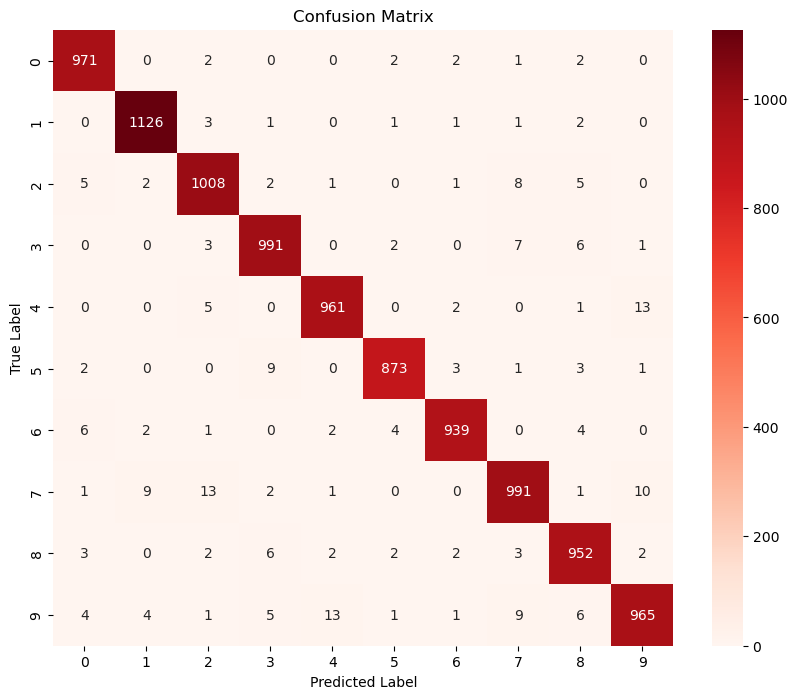

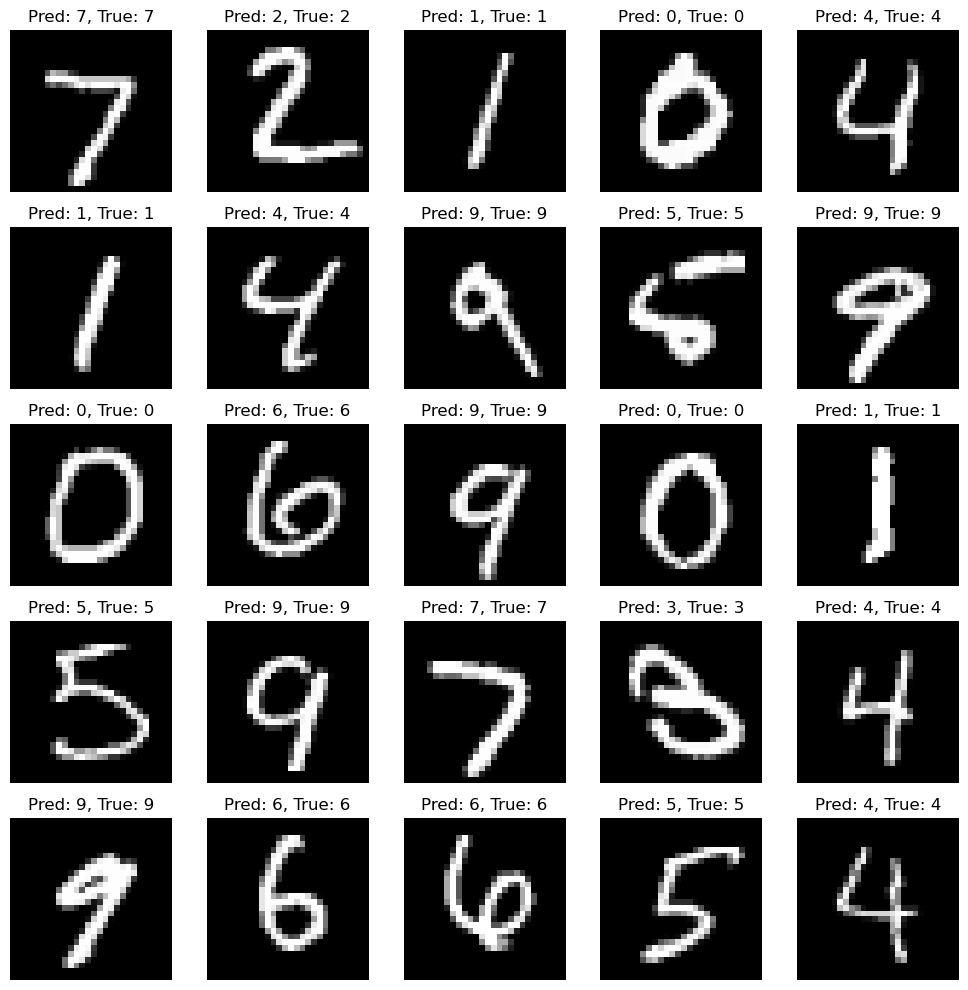

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Reds', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
def display_sample_predictions(images, true_labels, predictions):
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(2*num_cols, 2*num_rows))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i]}, True: {true_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample predictions (for SVM, for instance)
display_sample_predictions(X_test_flat[:25], y_test[:25], y_pred_svm[:25])


### Summary and Conclusions

SVM Model Accuracy: 97.77%
Logistic Regression Model Accuracy: 92.35%
The Support Vector Machine (SVM) model is better based on these accuracies. It has a higher accuracy score, indicating that it was able to correctly classify a higher percentage of the test images compared to the Logistic Regression model. This suggests that the SVM model is more effective at recognizing and differentiating between the handwritten digits in the MNIST dataset under the conditions and parameters used for training these models